## Importing dependencies

In [204]:
import numpy as np          #   used to make arrays
import pandas as pd         #   used to make dataframes / structured tables for the data
import matplotlib.pyplot as plt         #   used to create plots
import seaborn as sns       #   used to create graphs
from sklearn.model_selection import train_test_split        #   used to split our data into training data and test data
from xgboost import XGBRegressor        #   provides the gradient boosting algorithm
from sklearn import metrics         #   used to evaluate our model
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Getting Data

### Quick look at dataset

In [205]:
EXERCISE_DATA_PATH = '/content/sample_data/exercise.csv'
CALORIES_DATA_PATH = '/content/sample_data/calories.csv'

In [206]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [207]:
exercise_data = load_data(EXERCISE_DATA_PATH)
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [208]:
calories = load_data(CALORIES_DATA_PATH)
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


### Combining Data

In [209]:
#   data appended after last column
df = pd.concat([exercise_data, calories['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [210]:
df.shape

(15000, 9)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [212]:
# checking for missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [213]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Histograms

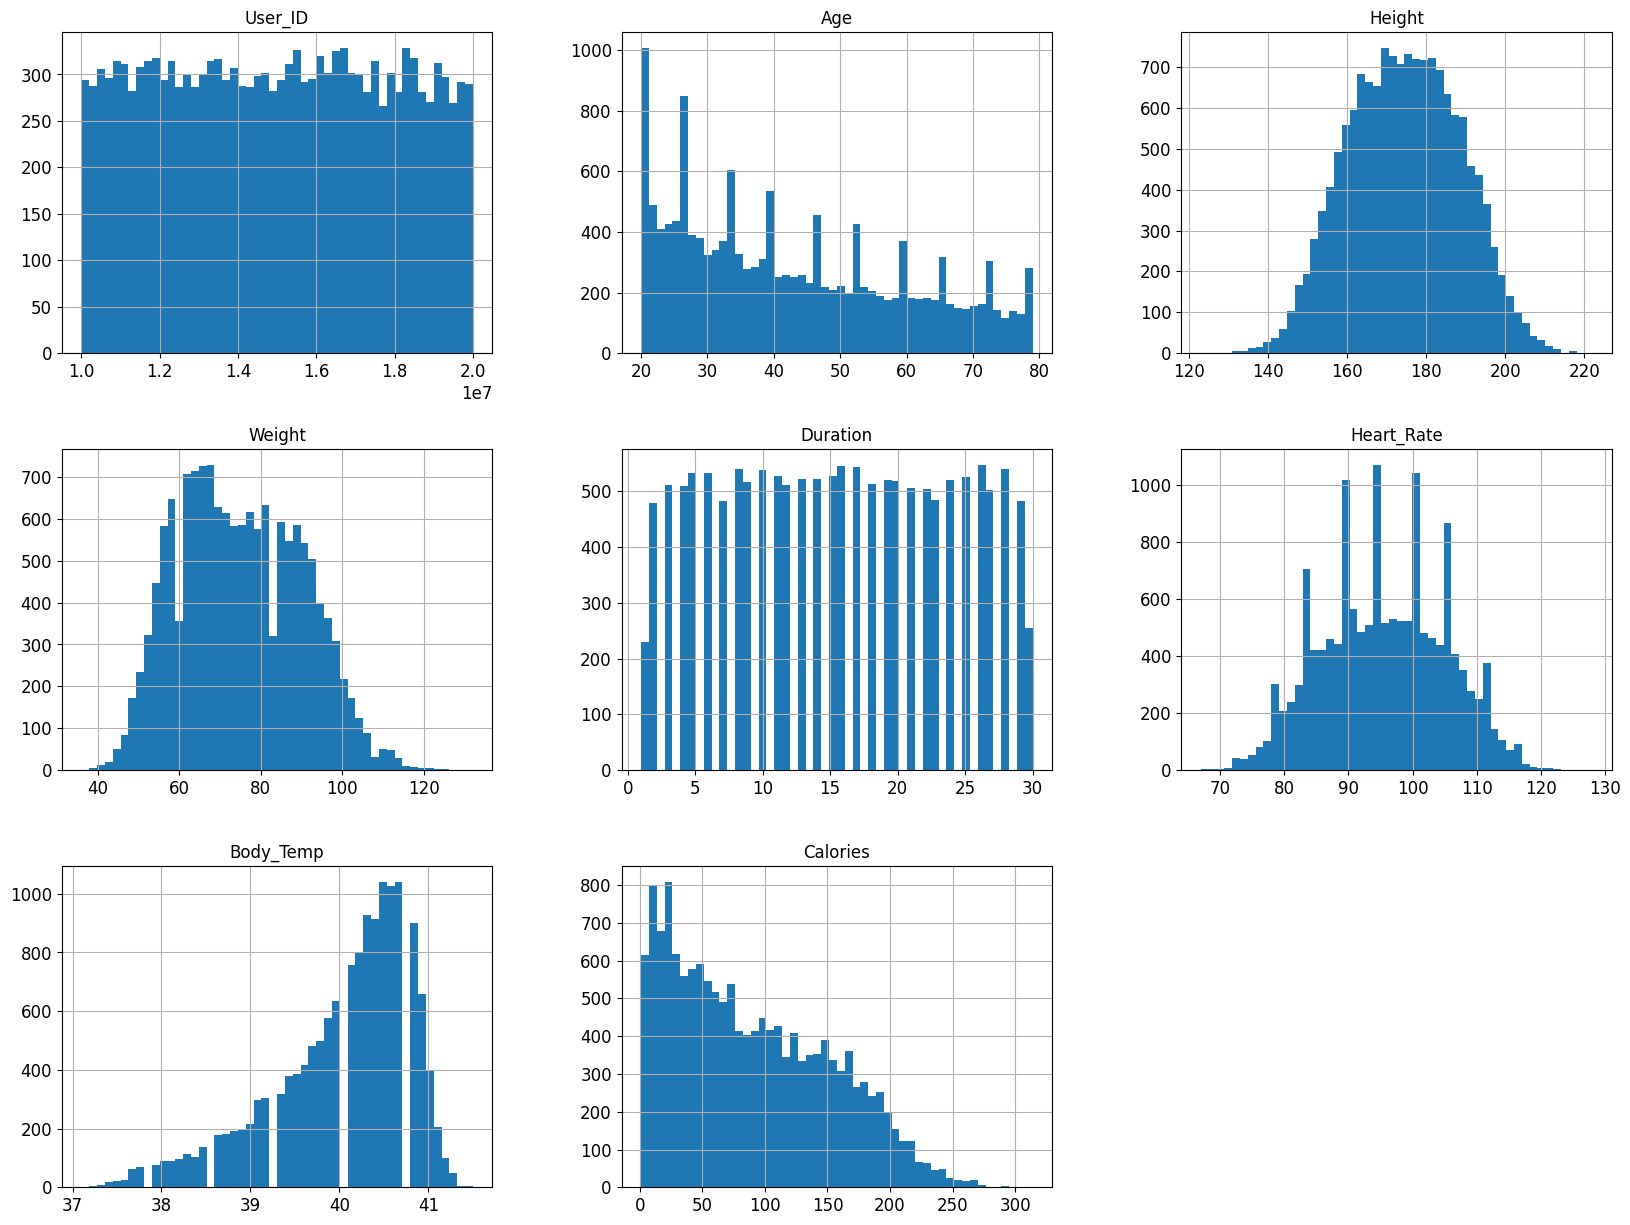

In [214]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Computing Correlation Matrix

In [215]:
# finding correlation of dataset
corr_matrix = df.corr(numeric_only = True)
print(corr_matrix)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


In [216]:
corr_matrix['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

Duration of exercise seems to have a strong, positive correlation with calories burned. We look at this feature specifically:

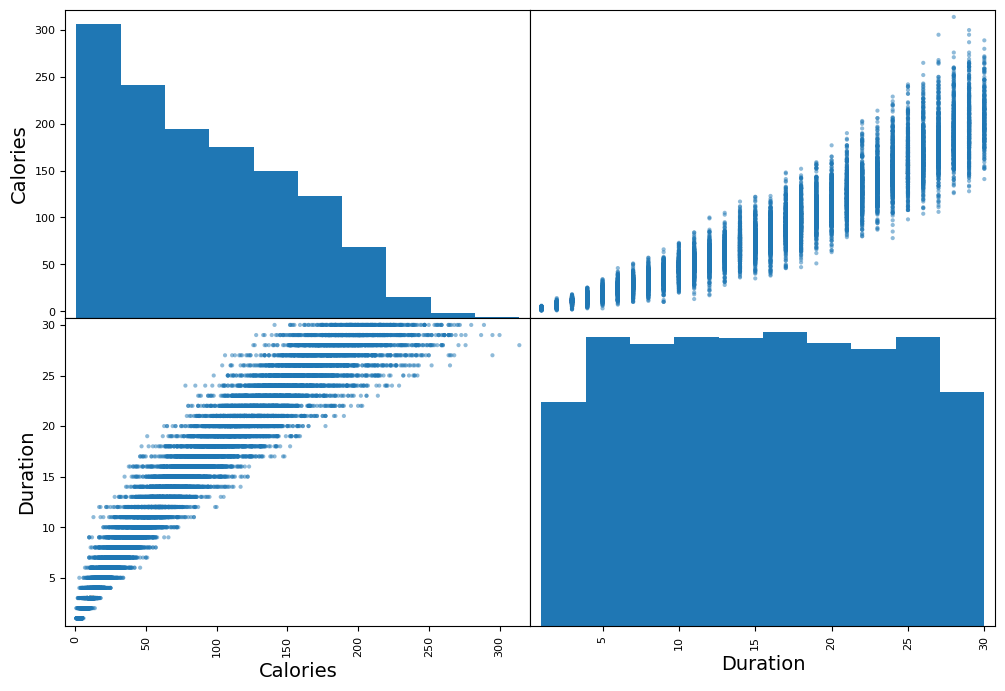

In [217]:
from pandas.plotting import scatter_matrix

attributes = ["Calories", "Duration"]
scatter_matrix(df[attributes], figsize=(12, 8));

## Creating Test Data
Using 20% of data for testing and the rest for training. We use Gender to create a stratified split.

In [218]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Gender"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [219]:
strat_test_set["Gender"].value_counts()/len(strat_test_set)

female    0.503667
male      0.496333
Name: Gender, dtype: float64

In [220]:
df["Gender"].value_counts()/len(df)

female    0.503533
male      0.496467
Name: Gender, dtype: float64

In [221]:
strat_test_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
7259,19651395,female,68,168.0,62.0,3.0,85.0,38.7,14.0
2563,11343832,male,38,181.0,88.0,19.0,100.0,40.7,107.0
5748,15331150,female,37,166.0,65.0,25.0,101.0,40.7,142.0
5816,11965928,male,20,185.0,91.0,17.0,96.0,40.3,72.0
6456,10253739,female,20,177.0,66.0,8.0,83.0,39.7,28.0


##   Preparing Data for ML algorithms


In [222]:
attrs = strat_train_set.drop(columns=['Calories'], axis=1)
attrs_labels = strat_train_set['Calories'].copy()

In [223]:
# verify the columns were dropped successfully
attrs.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
4822,17407051,female,40,172.0,70.0,11.0,94.0,39.7
9045,13546565,female,30,172.0,67.0,22.0,112.0,40.3
14504,10824389,female,40,165.0,64.0,8.0,87.0,39.9
4083,16826583,female,23,165.0,59.0,28.0,113.0,40.5
11977,12840383,female,33,154.0,57.0,10.0,92.0,39.9


In [224]:
attrs_labels.head()

4822      54.0
9045     148.0
14504     34.0
4083     190.0
11977     48.0
Name: Calories, dtype: float64

### Data Cleaning

In [225]:
# checking for any empty values
sample_incomplete_rows = attrs[attrs.isnull().any(axis=1)].head()
sample_incomplete_rows

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp


In [226]:
from sklearn.impute import SimpleImputer

# for handling any empty values
imputer = SimpleImputer(strategy="median")

In [227]:
attrs_num = attrs.drop(columns=["Gender"], axis=1)

In [228]:
imputer.fit(attrs_num)

SimpleImputer(strategy='median')

In [229]:
imputer.statistics_

array([1.4945187e+07, 4.0000000e+01, 1.7500000e+02, 7.4000000e+01,
       1.5000000e+01, 9.6000000e+01, 4.0200000e+01])

In [230]:
X = imputer.transform(attrs_num)

In [231]:
attrs_tr = pd.DataFrame(X,columns=attrs_num.columns, index=attrs_num.index)

In [232]:
attrs_tr.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000
mean,1.495538e+07,42.879417,174.500750,75.019500,15.502250,95.51400,40.022783
std,2.870608e+06,17.045823,14.241327,15.026197,8.341121,9.59465,0.783128
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.00000,37.100000
25%,1.244652e+07,28.000000,164.000000,63.000000,8.000000,88.00000,39.600000
50%,1.494519e+07,40.000000,175.000000,74.000000,15.000000,96.00000,40.200000
75%,1.741368e+07,56.000000,185.000000,87.000000,23.000000,103.00000,40.600000
max,1.999965e+07,79.000000,222.000000,128.000000,30.000000,128.00000,41.500000


### Handling Text and Categorical Attributes

In [233]:
# Converting STR to NUM type (machine cannot interpret str)
attrs_cat = attrs[["Gender"]]

In [234]:
# verifying
attrs_cat.head(10)

,Gender
4822,female
9045,female
14504,female
4083,female
11977,female
12721,male
12888,female
12235,female
14354,male
3650,male


In [235]:
from sklearn.preprocessing import OneHotEncoder

# to handle categorical data
cat_encoder = OneHotEncoder()
attrs_cat_1hot = cat_encoder.fit_transform(attrs_cat)

In [236]:
attrs_cat_1hot

<12000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 12000 stored elements in Compressed Sparse Row format>

In [237]:
attrs_cat_1hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [238]:
attrs_cat_1hot.toarray()[0]

array([1., 0.])

In [239]:
attrs_cat_1hot.toarray().shape

(12000, 2)

In [240]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object)]

### Pipeline
Preparing a pipeline for imputing and scaling.

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [242]:
num_pipeline = Pipeline([
        ('imputer', imputer),
        ('std_scaler', StandardScaler()),
    ])
attrs_num_tr = num_pipeline.fit_transform(attrs_num)

In [243]:
attrs_num_tr

array([[ 0.85409627, -0.16892916, -0.17560542, ..., -0.5397881 ,
        -0.15780285, -0.41218931],
       [-0.49079207, -0.75560759, -0.17560542, ...,  0.77903451,
         1.71832083,  0.35400138],
       [-1.43912416, -0.16892916, -0.66715312, ..., -0.89946699,
        -0.8874065 , -0.15679241],
       ...,
       [-0.9398366 ,  0.53508494, -0.31604762, ...,  1.01882043,
         1.30140446,  0.73709672],
       [-0.12450524, -1.22495032, -1.01825862, ..., -0.30000217,
         0.36334262,  0.48169983],
       [-1.07835172,  1.41510258,  0.94793219, ..., -1.01935995,
        -1.40855196, -0.9229831 ]])

### Use one hot encoding for categorical data and get the full pipeline

In [244]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(attrs_num)
cat_attribs = ["Gender"]
print(f'{cat_attribs}\n{num_attribs}')

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])
attrs_prepared = full_pipeline.fit_transform(attrs)

['Gender']
['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [245]:
attrs_prepared

array([[ 0.85409627, -0.16892916, -0.17560542, ..., -0.41218931,
         1.        ,  0.        ],
       [-0.49079207, -0.75560759, -0.17560542, ...,  0.35400138,
         1.        ,  0.        ],
       [-1.43912416, -0.16892916, -0.66715312, ..., -0.15679241,
         1.        ,  0.        ],
       ...,
       [-0.9398366 ,  0.53508494, -0.31604762, ...,  0.73709672,
         0.        ,  1.        ],
       [-0.12450524, -1.22495032, -1.01825862, ...,  0.48169983,
         1.        ,  0.        ],
       [-1.07835172,  1.41510258,  0.94793219, ..., -0.9229831 ,
         0.        ,  1.        ]])

## Training Models

### Linear Model

In [247]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(attrs_prepared, attrs_labels)

LinearRegression()

In [249]:
from sklearn.metrics import mean_squared_error

attrs_predictions = lin_reg.predict(attrs_prepared)
lin_mse = mean_squared_error(attrs_labels, attrs_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11.368594483528105

In [250]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(attrs_labels, attrs_predictions)
lin_mae

8.405677061990993

### Decision Tree

In [252]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(attrs_prepared, attrs_labels)

DecisionTreeRegressor(random_state=42)

In [254]:
attrs_predictions = tree_reg.predict(attrs_prepared)
tree_mse = mean_absolute_error(attrs_labels, attrs_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Model fine-tuning

### Cross validation

We use 10-fold cross validation on the linear model to obtain mean absolute error for each fold and the mean mean absolute error.

In [255]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, attrs_prepared, attrs_labels,
                         scoring="neg_mean_absolute_error", cv=10)
tree_mae_scores = -scores
print(scores)

[-3.54333333 -3.87583333 -3.72583333 -3.5925     -3.69166667 -3.96416667
 -3.61666667 -3.79       -3.75333333 -3.605     ]


In [256]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_mae_scores)

Scores: [3.54333333 3.87583333 3.72583333 3.5925     3.69166667 3.96416667
 3.61666667 3.79       3.75333333 3.605     ]
Mean: 3.7158333333333333
Standard deviation: 0.12725794015829955


In [257]:
lin_scores = cross_val_score(lin_reg, attrs_prepared, attrs_labels,
                             scoring="neg_mean_absolute_error", cv=10)
lin_mae_scores = -lin_scores
display_scores(lin_mae_scores)

Scores: [8.33959486 8.54237675 8.34404151 8.26466685 8.30011855 8.17467184
 8.49978095 8.36552807 8.81571724 8.50842963]
Mean: 8.415492625073044
Standard deviation: 0.1730426434960425


### Random Forest

In [259]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(attrs_prepared, attrs_labels)

RandomForestRegressor(random_state=42)

In [260]:
attrs_predictions = forest_reg.predict(attrs_prepared)
forest_mae = mean_absolute_error(attrs_labels, attrs_predictions)
forest_mae

0.6992925

In [261]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, attrs_prepared, attrs_labels,
                                scoring="neg_mean_absolute_error", cv=10)
forest_mae_scores = -forest_scores
display_scores(forest_mae_scores)

Scores: [1.81055    1.95341667 1.93015833 1.88749167 1.92835833 1.84816667
 1.94175    1.90510833 2.006525   1.771575  ]
Mean: 1.89831
Standard deviation: 0.06707657458705944


In [262]:
scores = cross_val_score(lin_reg, attrs_prepared, attrs_labels, scoring="neg_mean_absolute_error", cv=10)
pd.Series(-scores).describe()

count    10.000000
mean      8.415493
std       0.182403
min       8.174672
25%       8.309988
50%       8.354785
75%       8.506267
max       8.815717
dtype: float64

### Random forest indeed leads to lower MAE

In [263]:
pd.Series(forest_mae_scores).describe()

count    10.000000
mean      1.898310
std       0.070705
min       1.771575
25%       1.857998
50%       1.916733
75%       1.938852
max       2.006525
dtype: float64

In [264]:
pd.Series(tree_mae_scores).describe()

count    10.000000
mean      3.715833
std       0.134142
min       3.543333
25%       3.607917
50%       3.708750
75%       3.780833
max       3.964167
dtype: float64

In [265]:
pd.Series(lin_mae_scores).describe()

count    10.000000
mean      8.415493
std       0.182403
min       8.174672
25%       8.309988
50%       8.354785
75%       8.506267
max       8.815717
dtype: float64

### Grid Search for tuning hyperparameters

In [266]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'max_features': [2, 3, 4], 'n_estimators': [3, 10]}]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(attrs_prepared, attrs_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [267]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [268]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [269]:
cvres = grid_search.cv_results_
print(cvres)

{'mean_fit_time': array([0.11836262, 0.33790264, 0.60275335, 0.08723636, 0.21846204,
       0.64874659, 0.09871578, 0.52289281, 0.91266828, 0.12263851,
       0.4847898 , 1.51775575, 0.08071299, 0.27917528, 0.06987486,
       0.22422442, 0.07858243, 0.27335043]), 'std_fit_time': array([0.00504428, 0.11698809, 0.04023724, 0.00933878, 0.06425169,
       0.1096706 , 0.01546229, 0.10648763, 0.2308463 , 0.02597591,
       0.01717474, 0.2236247 , 0.00290076, 0.02618449, 0.0049432 ,
       0.00938937, 0.00238339, 0.00819155]), 'mean_score_time': array([0.00829172, 0.01852098, 0.02592916, 0.00346651, 0.00747199,
       0.02106595, 0.00331593, 0.02025771, 0.02013464, 0.00321002,
       0.0097404 , 0.02463655, 0.00385208, 0.01136265, 0.00261984,
       0.00881934, 0.00283566, 0.00841861]), 'std_score_time': array([0.00272642, 0.00721515, 0.00265676, 0.00015881, 0.00135251,
       0.0026801 , 0.00059488, 0.00963464, 0.00295269, 0.00065926,
       0.00029335, 0.00280071, 0.00018992, 0.00135038, 0.

In [270]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

6.460527777777777 {'max_features': 2, 'n_estimators': 3}
4.349950000000001 {'max_features': 2, 'n_estimators': 10}
3.5473296296296297 {'max_features': 2, 'n_estimators': 30}
3.7756388888888885 {'max_features': 4, 'n_estimators': 3}
2.7123749999999998 {'max_features': 4, 'n_estimators': 10}
2.225577777777777 {'max_features': 4, 'n_estimators': 30}
3.221055555555556 {'max_features': 6, 'n_estimators': 3}
2.352383333333333 {'max_features': 6, 'n_estimators': 10}
2.0400888888888895 {'max_features': 6, 'n_estimators': 30}
3.0839444444444446 {'max_features': 8, 'n_estimators': 3}
2.3357166666666664 {'max_features': 8, 'n_estimators': 10}
2.0403444444444445 {'max_features': 8, 'n_estimators': 30}
5.749935185185186 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.9468249999999996 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.287962962962963 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.0339263888888888 {'bootstrap': False, 'max_features': 3, 'n_estima

In [271]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118363,0.005044,0.008292,0.002726,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-6.515139,-6.763194,...,-6.460528,0.329928,18,-3.077604,-3.104549,-2.893819,-3.043403,-2.943403,-3.012556,0.080655
1,0.337903,0.116988,0.018521,0.007215,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-4.321042,-4.486042,...,-4.349950,0.109082,16,-2.123479,-2.156667,-2.056583,-2.085594,-2.126875,-2.109840,0.034909
2,0.602753,0.040237,0.025929,0.002657,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.460722,-3.595380,...,-3.547330,0.057328,12,-1.552128,-1.617451,-1.525759,-1.544847,-1.565569,-1.561151,0.030949
3,0.087236,0.009339,0.003467,0.000159,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.873750,-3.665139,...,-3.775639,0.118778,13,-1.760451,-1.759896,-1.859375,-1.740000,-1.824375,-1.788819,0.045314
4,0.218462,0.064252,0.007472,0.001353,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.685250,-2.678875,...,-2.712375,0.057256,7,-1.285906,-1.313354,-1.346000,-1.330479,-1.315438,-1.318235,0.019988
5,0.648747,0.109671,0.021066,0.002680,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.180181,-2.235292,...,-2.225578,0.026705,3,-0.970403,-0.973507,-0.972712,-0.981389,-0.992278,-0.978058,0.008015
6,0.098716,0.015462,0.003316,0.000595,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.208333,-3.192222,...,-3.221056,0.125824,10,-1.467153,-1.497743,-1.484757,-1.501944,-1.486944,-1.487708,0.012126
7,0.522893,0.106488,0.020258,0.009635,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.362000,-2.380375,...,-2.352383,0.062670,5,-1.075396,-1.092917,-1.095615,-1.097792,-1.081115,-1.088567,0.008749
8,0.912668,0.230846,0.020135,0.002953,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.080986,-2.103153,...,-2.040089,0.047226,1,-0.853101,-0.852476,-0.857292,-0.854792,-0.860990,-0.855730,0.003114
9,0.122639,0.025976,0.003210,0.000659,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.164722,-3.083750,...,-3.083944,0.053985,9,-1.407465,-1.416076,-1.401354,-1.396285,-1.430069,-1.410250,0.011905


### Randomized Search for more optimal parameters

In [272]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rnd_search.fit(attrs_prepared, attrs_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799fc9136110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799fc9134670>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [273]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

1.8779430555555556 {'max_features': 7, 'n_estimators': 180}
2.3349722222222224 {'max_features': 5, 'n_estimators': 15}
2.4080590277777776 {'max_features': 3, 'n_estimators': 72}
2.202603174603175 {'max_features': 5, 'n_estimators': 21}
1.887063524590164 {'max_features': 7, 'n_estimators': 122}
2.397853333333333 {'max_features': 3, 'n_estimators': 75}
2.37939678030303 {'max_features': 3, 'n_estimators': 88}
1.9361333333333335 {'max_features': 5, 'n_estimators': 100}
2.325838888888889 {'max_features': 3, 'n_estimators': 150}
4.08775 {'max_features': 5, 'n_estimators': 2}


In [274]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.00075311, 0.02643415, 0.00137763, 0.00312342, 0.74679783,
       0.1696607 , 0.04513768, 0.00335088, 0.0033646 ])

In [279]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7467978301609396, 'Duration'),
 (0.16966069863095115, 'Heart_Rate'),
 (0.045137680557374334, 'Body_Temp'),
 (0.02643415272456769, 'Age'),
 (0.0033508770547985753, array(['female', 'male'], dtype=object)),
 (0.003123421717707925, 'Weight'),
 (0.0013776295279761199, 'Height'),
 (0.0007531129639827373, 'User_ID')]

## Model Evaluation

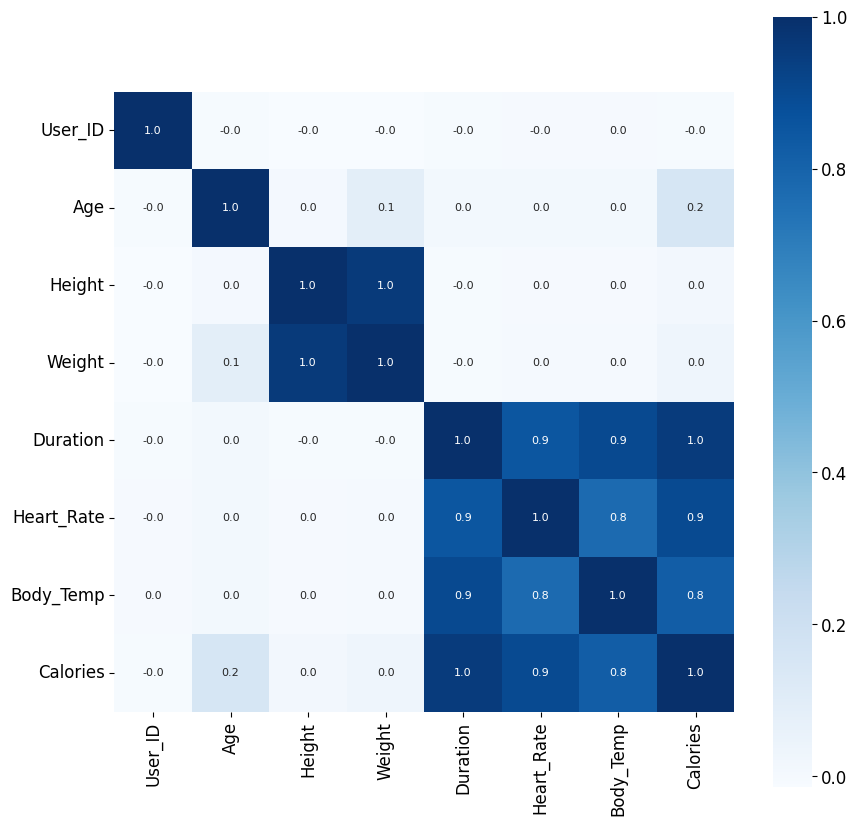

In [280]:
#   constructing a heatmap to interpret correlation

plt.figure(figsize=(10,10))
sns.heatmap(
    corr_matrix,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size':8},
    cmap='Blues'
    )
plt.show()

In [281]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Calories", axis=1)
y_test = strat_test_set["Calories"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mae = mean_absolute_error(y_test, final_predictions)

In [282]:
final_mae

1.8612888888888885

In [283]:
diff = final_predictions - y_test

In [284]:
pd.Series(diff).describe()

count    3000.000000
mean       -0.046133
std         2.912964
min       -25.066667
25%        -1.108333
50%         0.033333
75%         1.133333
max        15.933333
Name: Calories, dtype: float64

<Axes: >

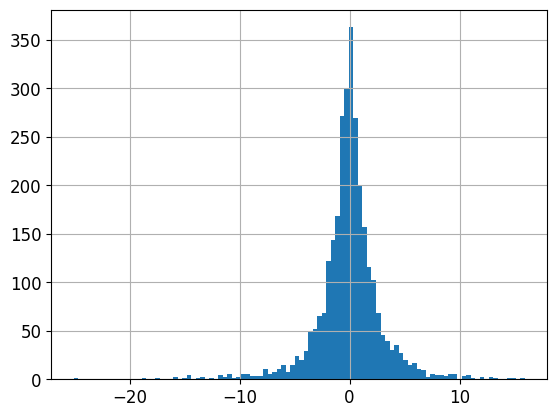

In [285]:
pd.Series(diff).hist(bins=100)

### Obtain the 95% of the middle predictions and examine them

In [286]:
import pandas as pd

# Step 1: Sort the Series
sorted_series = pd.Series(diff).sort_values()

# Step 2: Calculate the start and end indices for the middle 95 percent
total_elements = len(sorted_series)
start_index = int(total_elements * 0.025)  # Start index of the middle 95%
end_index = int(total_elements * 0.975)    # End index of the middle 95%

# Step 3: Slice the Series to get the middle 95 percent of data
middle_95_percent_data = sorted_series[start_index:end_index]

middle_95_percent_data.describe()

count    2850.000000
mean       -0.007333
std         2.010394
min        -6.366667
25%        -1.033333
50%         0.033333
75%         1.066667
max         5.900000
Name: Calories, dtype: float64

<Axes: >

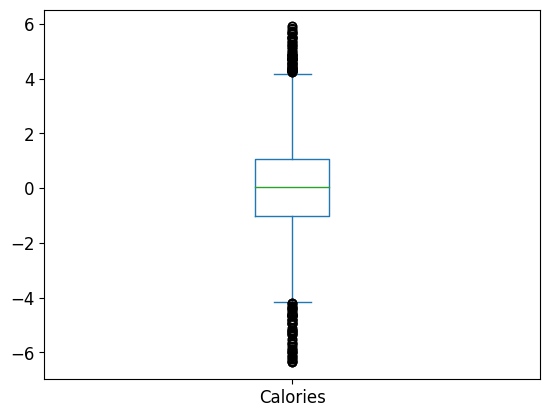

In [287]:
middle_95_percent_data.plot.box()

In [288]:
abs(middle_95_percent_data).describe()

count    2850.000000
mean        1.477462
std         1.363114
min         0.000000
25%         0.433333
50%         1.066667
75%         2.100000
max         6.366667
Name: Calories, dtype: float64

<Axes: >

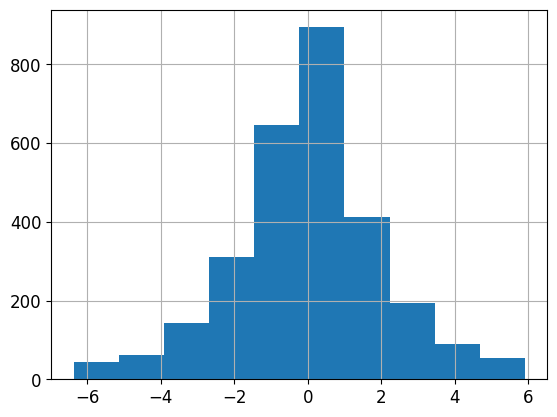

In [289]:
middle_95_percent_data.hist()